# pyimagej + clij = clijpy

In this notebook we combine [pyimagej](https://github.com/imagej/pyimagej) and [clij2](https://clij.github.io). Note: This bridge is experimental.

We start by initializing ImageJ. Additionally, we specify 'clij2_' as maven dependency.

In [2]:
import imagej # pyimagej

# Start up ImageJ with CLIJ2
ij = imagej.init('net.imagej:imagej+net.haesleinhuepf:clij2_')

We then use the [jpype](https://jpype.readthedocs.io/en/latest/) to initialize clij2 from python:

In [3]:
# Get a Python Class from a Java Class
import jpype
CLIJ2 = jpype.JPackage("net").haesleinhuepf.clij2.CLIJ2

# Initialize the GPU
clij2 = CLIJ2.getInstance()

# Test if it works
clij2.getGPUName()

'NVIDIA GeForce RTX 3050 Ti Laptop GPU'

In [4]:
# Load image using ImageJ
image = ij.io().open("https://fiji.sc/samples/blobs.png")

# Push image to GPU
image_gpu = clij2.push(image)
image_gpu

<java object 'net.haesleinhuepf.clij.clearcl.ClearCLBuffer'>

The image is now loaded within ImageJ and we need to transfer its data to GPU memory using the `push()` command. After so, we can proess the image using clij2:

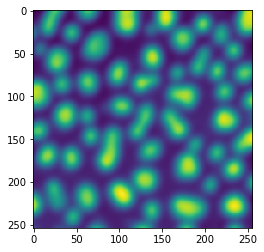

In [6]:
# Create an image for the output
blurred_gpu = clij2.create(image_gpu)

# blur the image
clij2.gaussianBlur(image_gpu, blurred_gpu, 5, 5)

# pull the result back from the GPU
blurred = clij2.pull(blurred_gpu)

# show it
ij.py.show(blurred)

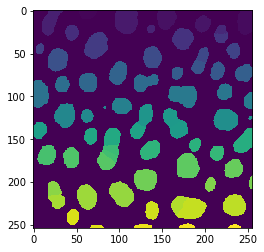

In [7]:
labeled_gpu = clij2.create(image_gpu)

clij2.voronoiOtsuLabeling(image_gpu, labeled_gpu, 3, 1)

ij.py.show(clij2.pull(labeled_gpu))

In [9]:
print("Number of segmented objects:")

clij2.maximumOfAllPixels(labeled_gpu)

Number of segmented objects:


69.0

We can also transfer the image back from GPU memory and turn it into a numpy array like this:

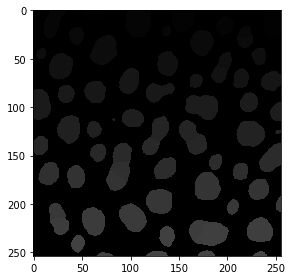

In [11]:
labeled_ij = clij2.pull(labeled_gpu)

labeled_np = ij.py.from_java(labeled_ij)

from skimage.io import imshow
imshow(labeled_np)